<a href="https://colab.research.google.com/github/raghav1674/FacerecogusingVGG16/blob/master/FaceRecogipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications import vgg16

Using TensorFlow backend.


In [0]:
model=vgg16.VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
for layer in model.layers:
  layer.trainable=False

In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from keras.layers import Dense,Flatten,Dropout
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model
    
model.input
model.layers

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 2

FC_Head = addTopModel(model, num_classes)

modelnew = Model(inputs=model.input, outputs=FC_Head)

print(modelnew.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
train_data_dir=r"drive/My Drive/data/train"
validation_data_dir=r"drive/My Drive/data/test"

train_datagen=ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
img_rows=224
img_cols=224

train_batchsize = 64
val_batchsize = 64
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 200 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [0]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("facemodel.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
modelnew.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 544
nb_validation_samples = 200
epochs = 3
batch_size = 64

history = modelnew.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

modelnew.save("facemodel.h5")

Epoch 1/3


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


3/8 [==========>...................] - ETA: 4:34 - loss: 8.4547 - accuracy: 0.7206 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


8/8 [==============================] - 445s 56s/step - loss: 4.9072 - accuracy: 0.7525 - val_loss: 0.6519 - val_accuracy: 0.8542

Epoch 00001: val_loss improved from inf to 0.65187, saving model to facemodel.h5
Epoch 2/3
8/8 [==============================] - 273s 34s/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 0.0098 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.65187 to 0.00980, saving model to facemodel.h5
Epoch 3/3
8/8 [==============================] - 275s 34s/step - loss: 5.1032e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00980 to 0.00000, saving model to facemodel.h5


In [0]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import load_model
modelnew=load_model("family.h5")

In [150]:
oimg=image.load_img(r"drive/My Drive/data/train/raghav/WIN_20200519_03_15_43_Pro.jpg",target_size=(224,224))
oimg.size


(224, 224)

In [151]:
img=image.img_to_array(oimg)
import numpy as np
img.shape

(224, 224, 3)

In [0]:
img=np.expand_dims(img,axis=0)
img.shape
img=modelnew.predict(img)

# from keras.applications.vgg16 import decode_predictions
# decode_predictions(img)


In [153]:
img.shape
img

array([[0., 1.]], dtype=float32)

In [0]:
if img[0][0]==1 and img[0][1]==0:
  char="RAGHAV"
elif img[0][0]==0 and img[0][1]==1:
  char="RAJNI"
else:
  char="DONT KNOW"
# from keras.applications.vgg16 import decode_predictions
# decode_predictions(img)


RAJNI


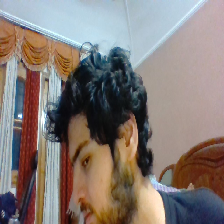

In [155]:
print(char)

image.array_to_img(oimg)

In [0]:
modelnew.save("family.h5")

In [127]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     